In [53]:
%load_ext dotenv
%dotenv

The dotenv extension is already loaded. To reload it, use:
  %reload_ext dotenv


In [54]:
import requests
import networkx as nx
import matplotlib.pyplot as plt
import os

In [55]:
URL = 'https://api.vk.com/method/friends.get'
V = '5.131'

TOKEN = os.getenv("TOKEN")
USER_ID = '196377181'

request = f"{URL}?" \
            f"v={V}&" \
            f"access_token={TOKEN}&" \
            f"user_id={USER_ID}&"

graph = {}

print(requests.get(request).json())
data = requests.get(request).json()['response']['items']
graph[USER_ID] = data

{'response': {'count': 45, 'items': [4830573, 30239821, 99138057, 113927298, 135351753, 144129956, 159492850, 161932935, 169198295, 169949601, 172247785, 174335831, 178228840, 184206316, 189957161, 223167799, 225556604, 225627698, 225632479, 233906239, 240200561, 244495362, 249162848, 250067847, 253407490, 256910157, 258213340, 259332134, 263745401, 280542951, 282145023, 291943565, 304081097, 308776498, 315233980, 339358476, 345327842, 356867187, 372159361, 406828060, 424785061, 528450309, 610998322, 662741463, 744759328]}}


# Создание графа

In [56]:
unique_ids = set()

for id in data: # Получаем друзей по vk id, которые получили раньше
    if len(unique_ids) > 200:
        break
    try:
        request = f"{URL}?" \
                  f"v={V}&" \
                  f"access_token={TOKEN}&" \
                  f"user_id={id}&"
    
        data = requests.get(request).json()['response']['items']
        graph[str(id)] = data
        unique_ids.update(data)
    except KeyError:
        pass
print(len(unique_ids))

# Создание графа NetworkX
G = nx.Graph()

# Добавление рёбер в граф
for node, neighbors in graph.items():
    for neighbor in neighbors:
        G.add_edge(node, neighbor)


858


In [57]:
# Узел, для которого нужно рассчитать центральность
target_node = USER_ID

## Центральность по близости

In [58]:
closeness_centrality = nx.closeness_centrality(G, u=target_node)
print(f'Центральность по близости для узла {target_node}: {closeness_centrality:.4f}')

Центральность по близости для узла 196377181: 0.3451


Центральность по близости измеряет, насколько быстро узел может достичь всех других узлов в графе. Узел с высокой близостью имеет короткие пути ко всем другим узлам. В контексте графа друзей и друзей друзей, это означает, что узел (например, пользователь) может быстро связаться со всеми своими друзьями и их друзьями. Это полезно для определения, кто из друзей является наиболее "доступным" для общения и взаимодействия.

## Центральность по посредничеству

In [59]:
betweenness_centrality = nx.betweenness_centrality(G, normalized=True)[target_node]
print(f'Центральность по посредничеству для узла {target_node}: {betweenness_centrality:.4f}')

Центральность по посредничеству для узла 196377181: 0.0686


В графе друзей это может означать, что некоторые друзья могут связывать другие группы друзей, обеспечивая тем самым важные социальные связи. 

## Центральность по собственному вектору

In [63]:
# Расчет центральности по собственному вектору
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)[target_node]
print(f'Центральность по собственному вектору для узла {target_node}: {eigenvector_centrality:.4f}')

Центральность по собственному вектору для узла 196377181: 0.0122


Узел получает высокую оценку, если его соседи также имеют высокую центральность. В графе друзей это означает, что если у пользователя много влиятельных друзей, его собственная центральность будет выше. Это подчеркивает важность не только количества связей, но и их значимости.

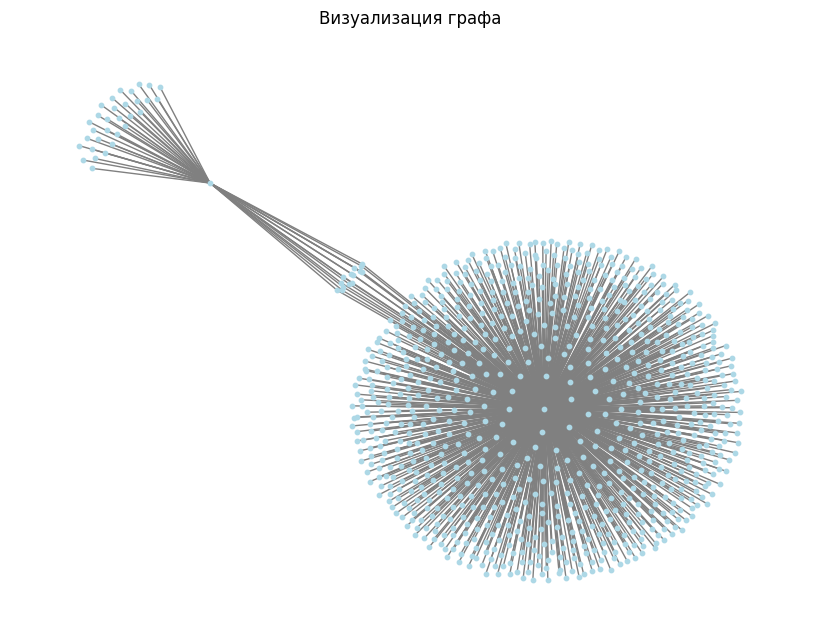

In [61]:
# Визуализация графа
plt.figure(figsize=(8, 6))
pos = nx.spring_layout(G)  # Позиции узлов
nx.draw(G, pos, with_labels=False, node_size=10, node_color='lightblue', font_size=0, edge_color='gray')
plt.title('Визуализация графа')
plt.show()